<a href="https://www.kaggle.com/code/alawdisoft/sales-analysis-insights-internship?scriptVersionId=145277627" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sales Analysis Insights-Internship In Intern2Grow

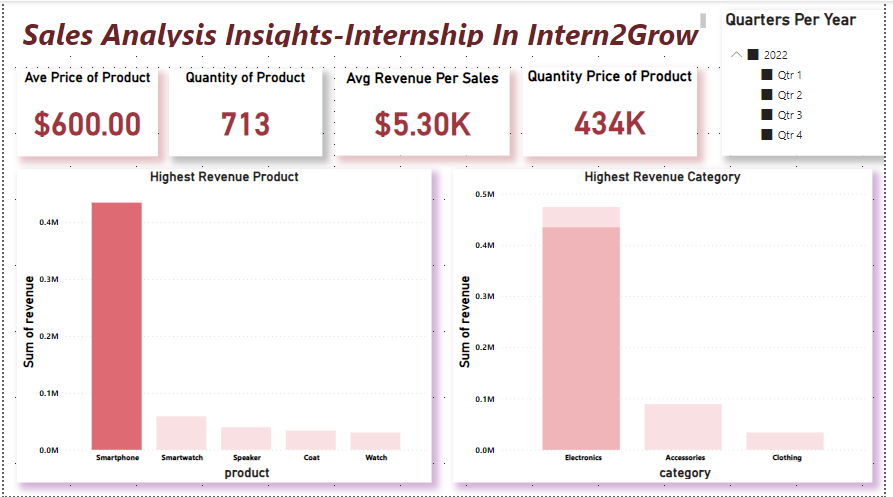

# Dataset

The dataset you will be using is a CSV file called sales_data.csv. It contains information about sales made by a fictional company over the course of a year. The columns in the dataset are as follows:

* **date**: The date of the sale (in YYYY-MM-DD format)
* **product**: The name of the product sold
* **category**: The category of the product (e.g. "electronics", "clothing", etc.)
* **price**: The price of the product (in USD)
* **quantity**: The quantity of the product sold
* **revenue**: The total revenue generated by the sale (i.e. price * quantity)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-dataset/sales_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/sales-dataset/sales_data.csv")

In [3]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


# Check the dtypes of the columns

In [4]:
df.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

**Should we convert the type of date to Datetime type** 

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Format the 'date_range' column to "YYYY-MM-DD" format
df['date'] = df['date'].dt.strftime("%Y-%m-%d")


# Drop Nulls Values

In [6]:
df.dropna(inplace=True)

# Answer Questions

* What was the total revenue generated by the company over the course of the year?
* Which product had the highest revenue? How much revenue did it generate?
* What was the average price of a product sold by the company?
* What was the total quantity of products sold by the company?
* Which category had the highest revenue? How much revenue did it generate?
* What was the average revenue per sale?
* What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)


For each question, please provide the answer and any supporting calculations or visualizations. You may use any tools or programming languages that you are comfortable with.

In [7]:
TotalofRevenuePerYear = df['revenue'].sum()
print("What was the total revenue generated by the company over the course of the year?")
print("The Total of Revenue Per Year is :" , TotalofRevenuePerYear)

What was the total revenue generated by the company over the course of the year?
The Total of Revenue Per Year is : 748430.0


**Which product had the highest revenue? How much revenue did it generate?**

In [8]:
revenueByProduct = df[['revenue' , 'product']].groupby("product")["revenue"].sum()
revenueByProduct = revenueByProduct.reset_index().sort_values(by='revenue', ascending=False)
revenueByProduct

,product,revenue
6,Smartphone,427800.0
7,Smartwatch,58800.0
9,Speaker,39680.0
1,Coat,33800.0
13,Watch,30450.0
8,Sneakers,21600.0
3,Hoodie,21000.0
4,Jeans,20650.0
0,Backpack,20400.0
10,T-Shirt,20100.0


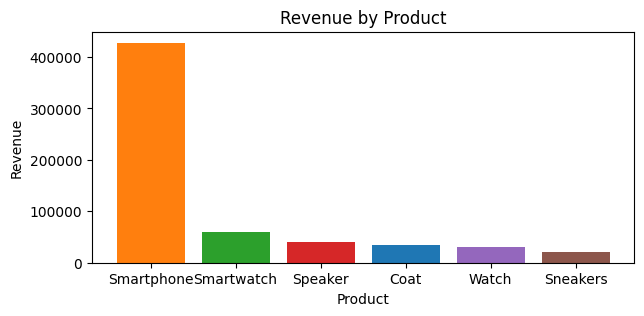

In [9]:
# Define a color palette
colors = ['#ff7f0e', '#2ca02c', '#d62728','#1f77b4', '#9467bd', '#8c564b']

# Create a bar plot with different colors for the first 6 bars
plt.figure(figsize=(7, 3))  # Set the figure size
bars = plt.bar(revenueByProduct['product'][:6], revenueByProduct['revenue'][:6], color=colors)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')

# Show the plot
plt.show()

**What was the average price of a product sold by the company?**

In [10]:
Avg_price = round(sum(df['price']) /  len(df) , 2)
print("What was the average price of a product sold by the company?")
print("The Average price of product is :" , Avg_price)

What was the average price of a product sold by the company?
The Average price of product is : 210.19


**What was the total quantity of products sold by the company?**

In [11]:
Avg_quantity = round(sum(df['quantity']) /  len(df) , 2)
print("What was the average quantity of a product sold by the company?")
print("The Average quantity of product is :" , Avg_quantity )

What was the average quantity of a product sold by the company?
The Average quantity of product is : 14.52


**Which category had the highest revenue? How much revenue did it generate?**

In [12]:
revenueByCategory = df[['revenue' , 'category']].groupby("category")["revenue"].sum()
revenueByCategory = revenueByCategory.reset_index().sort_values(by='revenue', ascending=False)
revenueByCategory

,category,revenue
5,Electronics,509480.0
0,Accessories,101400.0
4,Clothing,94350.0
6,Shoes,20640.0
1,Bags,19500.0
3,Clohting,1200.0
7,Shoeses,960.0
2,Bgas,900.0


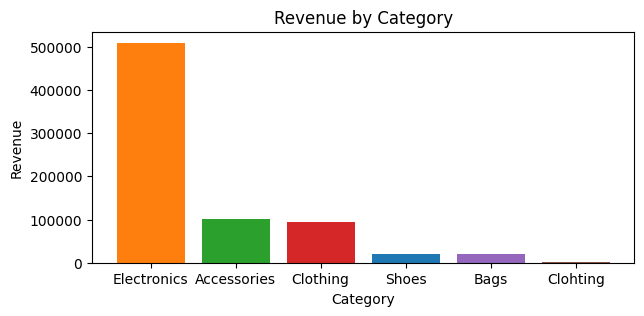

In [13]:
# Define a color palette
colors = ['#ff7f0e', '#2ca02c', '#d62728','#1f77b4', '#9467bd', '#8c564b']

# Create a bar plot with different colors for the first 6 bars
plt.figure(figsize=(7, 3))  # Set the figure size
bars = plt.bar(revenueByCategory['category'][:6], revenueByCategory['revenue'][:6], color=colors)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by Category')

# Show the plot
plt.show()

**What was the average revenue per sale?**

In [14]:
Avg_revenue = round(sum(df['revenue']) / len(df) , 2) 
print("What was the average revenue per sale?")
print("is :" , Avg_revenue)

What was the average revenue per sale?
is : 2050.49


**What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)**

In [15]:
df['date'] = pd.to_datetime(df['date'])
# Extract the quarter from the 'date' column
df['quarter'] = df['date'].dt.quarter

# Group by quarter and calculate the total revenue for each quarter
total_revenue_by_quarter = df.groupby('quarter')['revenue'].sum()

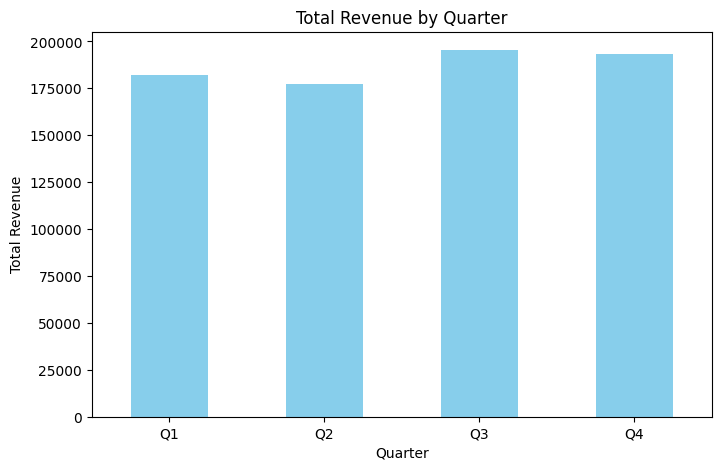

In [16]:
# Create custom labels for quarters
quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

# Replace quarter numbers with custom labels
total_revenue_by_quarter.index = total_revenue_by_quarter.index.map(quarter_labels)

# Plot the total revenue by quarter
plt.figure(figsize=(8, 5))
total_revenue_by_quarter.plot(kind='bar', color='skyblue')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Quarter')
plt.xticks(rotation=0)
plt.show()